In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


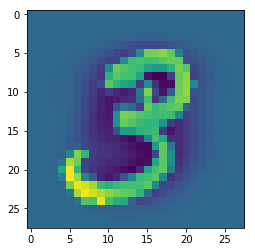

In [12]:
first_array=mnist.train.images[1]
first_array=np.reshape(first_array*255,(28,28))

plt.imshow(first_array)
plt.show()


In [13]:
print(mnist.train.images.shape)

(55000, 784)


In [14]:
#subtract_mean
array=np.transpose(mnist.train.images)


In [15]:
#reduce mean
for i in range(len(array)):
    array[i]=array[i]-np.mean(array[i])


In [16]:
sigma=1/55000*np.dot(array,np.transpose(array))
print(sigma.shape)

(784, 784)


In [17]:
U, S, V = np.linalg.svd(sigma, full_matrices=True)


In [18]:
transformation_matrix=np.transpose(U)[:3]


In [19]:
projection=np.dot(transformation_matrix,array)

Saved


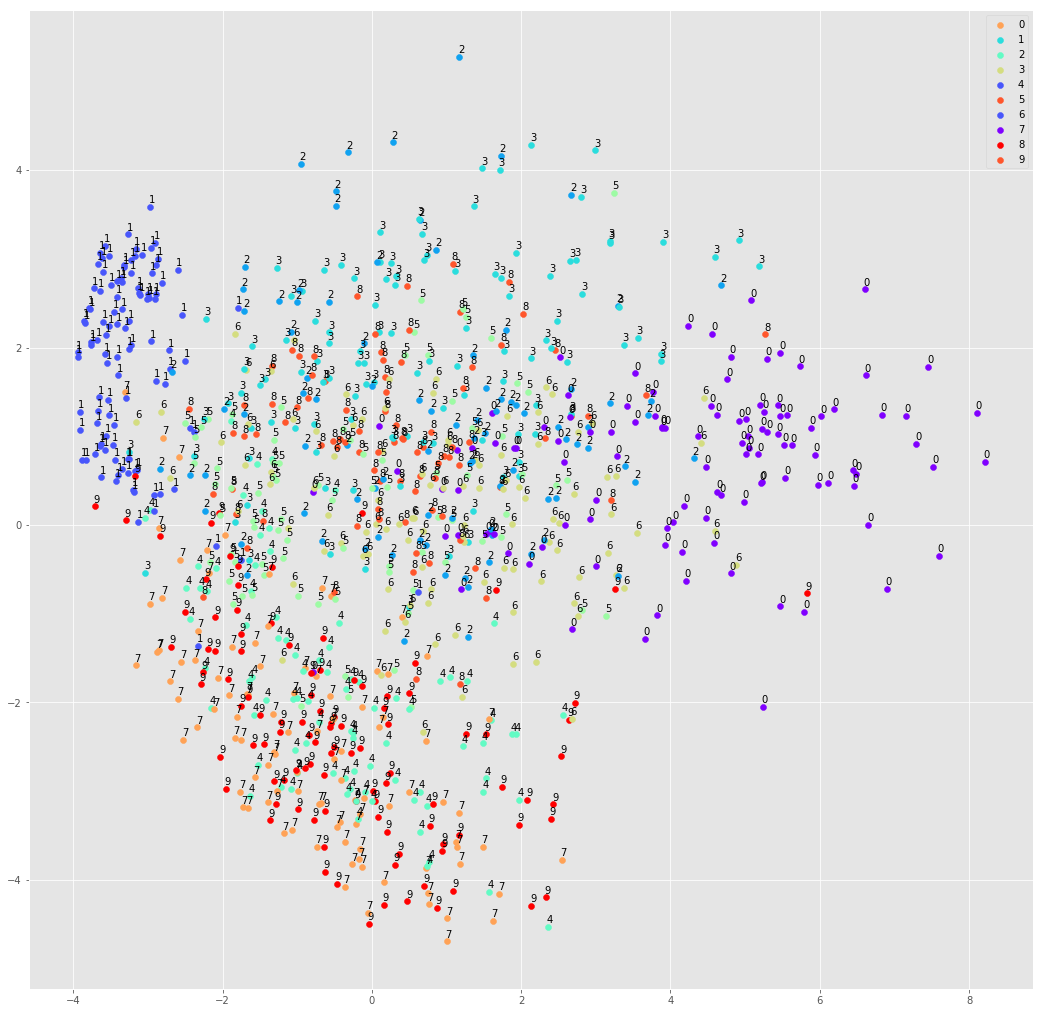

In [39]:
import matplotlib.cm as cm

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(18, 18))
colors = cm.rainbow(np.linspace(0, 1, 10))
labels=['0','1','2','3','4','5','6','7','8','9']
for i,label in enumerate(mnist.train.images[:1000]):
    plt.scatter(projection[0][i],projection[1][i],color=colors[np.argmax(mnist.train.labels[i])])
    plt.annotate(labels[np.argmax(mnist.train.labels[i])],
                 xy=(projection[0][i], projection[1][i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.legend(labels)

plt.savefig('pca.png')
print("Saved")
plt.show()



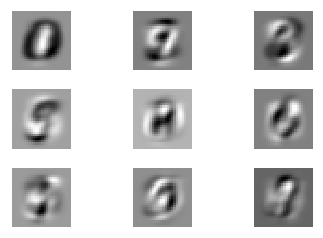

In [21]:
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
images=np.transpose(U)[:9]
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28)*255, cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()    
    

Saved


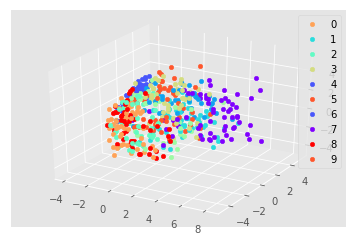

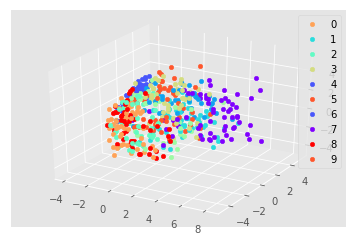

In [38]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,label in enumerate(mnist.train.images[:500]):
    ax.scatter(projection[0][i],projection[1][i],projection[2][i],color=colors[np.argmax(mnist.train.labels[i])],label=labels[np.argmax(mnist.train.labels[i])])
ax.legend(labels)
plt.savefig('pca3d.png')
print("Saved")
plt.show()


In [23]:
print(projection.shape)
recovered=np.dot(transformation_matrix.T,projection)

(3, 55000)


In [24]:
recovered.shape

(784, 55000)

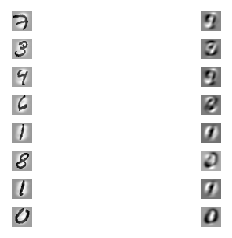

In [25]:
recovered_images=[]
for i in range(8):
    recovered_images.append(np.reshape(recovered.T[i]*255,(28,28)))
fig, axes = plt.subplots(8, 2)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
images=np.transpose(U)[:9]
for i, ax in enumerate(axes.flat):
    if i%2!=0:
        ax.imshow(recovered_images[(i-1)//2], cmap='binary')
    else:
        ax.imshow(np.reshape(mnist.train.images[i//2]*255,(28,28)), cmap='binary')
        
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

saved


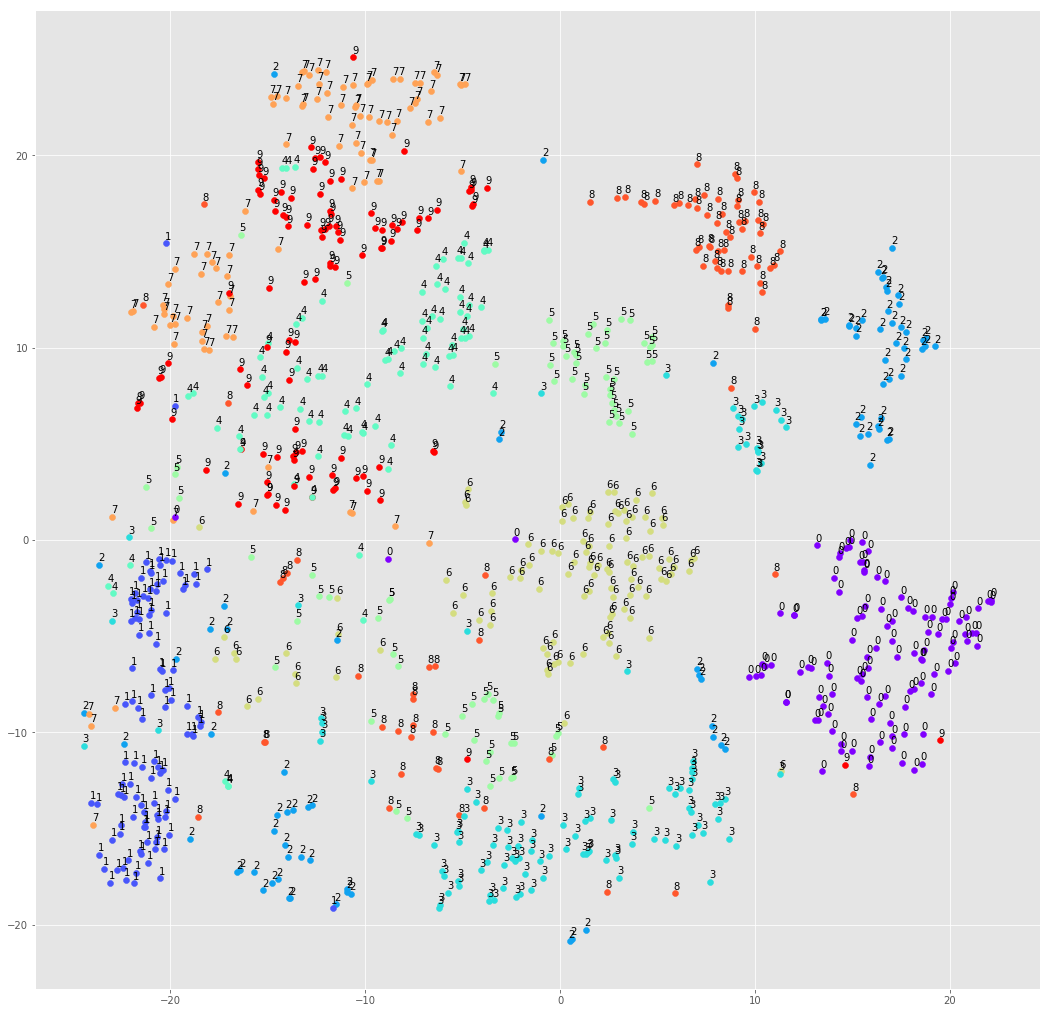

In [30]:
from six.moves import xrange  # pylint: disable=redefined-builtin

def plot_with_labels(low_dim_embs, labels, filename='tsneonmnist.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y,color=colors[label])
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    
    plt.savefig(filename)
    print("saved")
    plt.show()

try:
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    plot_only = 1000
    low_dim_embs = tsne.fit_transform(mnist.train.images[:plot_only, :])
    labels = [np.argmax(mnist.train.labels[i]) for i in xrange(plot_only)]
    plot_with_labels(low_dim_embs, labels)

except ImportError:
    print("Please install sklearn, matplotlib, and scipy to visualize embeddings.")